In [1]:
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState
from langgraph.checkpoint.memory import MemorySaver

from pprint import pprint
from typing import Annotated
from typing_extensions import TypedDict
from IPython.display import display, Image
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [2]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-2.5-32b")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000028F82257140>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000028F822D7B30>, model_name='qwen-2.5-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [3]:
sys_msg=SystemMessage(content='You are an assistant tasked with creating a catchy, descriptive, and relevant title for any given topic. The title should capture the essence of the topic and be engaging to the audience. Please keep it brief and ensure it aligns with the subject matter provided.')

def title_creator(state:MessagesState):
    return {'messages':[llm.invoke([sys_msg]+state['messages'])]}

In [4]:
sys_msg = SystemMessage(content="You are an assistant tasked with generating informative and engaging content for a given title and topic. Your response should provide clear, detailed explanations, examples, and relevant information that elaborates on the subject. Ensure the content is well-organized, coherent, and aligned with the title provided. Aim to educate, inform, or entertain the audience based on the topic's nature.")

def content_writer(state:MessagesState):
    return {'messages':[llm.invoke([sys_msg]+state['messages'])]}

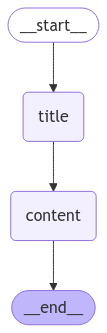

In [5]:
memory= MemorySaver()
config={'configurable':{'thread_id':'1'}}
## Graph
builder2=StateGraph(MessagesState)
builder2.add_node("title",title_creator)
builder2.add_node("content",content_writer)
builder2.add_edge(START,"title")
builder2.add_edge("title","content")
builder2.add_edge("content",END)
tool_graph1=builder2.compile(checkpointer=memory)

## display
display(Image(tool_graph1.get_graph().draw_mermaid_png()))

In [7]:
events = tool_graph1.stream(
    {"messages": [{"role": "user", "content": "I need a title for a blog post about the benefits of exercise."}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

I need a title for a blog post about the benefits of exercise.
================================== Ai Message ==================================

Title: "Unlocking Health and Happiness: The Transformative Benefits of Regular Exercise"
================================== Ai Message ==================================

That sounds like a great title! Here's a sample blog post based on that title:

---

## Unlocking Health and Happiness: The Transformative Benefits of Regular Exercise

### Introduction

Exercise is more than just a way to keep fit or lose weight; it's a powerful tool for enhancing overall health and well-being. From mental clarity to physical strength, the benefits of regular exercise are numerous and profound. This blog post will explore the myriad ways in which exercise can transform your life.

### Physical Health Benefits

#### Weight Management
Regular exercise helps in burning calories an